# Ayudantía Pandas

## Basado en L05 2019-2

Pueden obtener los archivos utilizados para esta ayudantia en [este link](https://drive.google.com/file/d/14v8jOGsDjSuG1bEGeW2nXK_yMA-n0PS0/view?usp=sharing) (deben ingresar con el correo UC).
De todas formas los archivos provienen de la [EOD 2012](http://datos.gob.cl/dataset/31616).

Deben colocar estos archivos en el mismo directorio del Jupyter Notebook, en caso contrario deben modificar la ruta cada vez que se llama a la funcion `pd.read_csv`

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
import math
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder

# Mision 1

Importar las tablas a Pandas Dataframe

In [5]:
# Defino una función que cargue el csv y muestre las 5 primeras filas
def cargar_csv(csv_name, sep=',', decimal='.', show=True):
    dataframe = pd.read_csv(csv_name, sep=sep, decimal=decimal, encoding='latin-1')
    if show:
        mostrar_df(dataframe, csv_name)
    return dataframe

def mostrar_df(dataframe, csv_name):
    display('-------------' + csv_name.upper() + '-------------')
    display(dataframe.head(5))

In [6]:
#Cargamos cada uno de los dataframe
hogares = cargar_csv('Hogares.csv', ';', ",")
vehiculos = cargar_csv("Vehiculo.csv", ";")
personas = cargar_csv("personas.csv", ";", ",")
edad_personas = cargar_csv("Edadpersonas.csv", ";")
viajes = cargar_csv("viajes.csv", sep= ";", decimal= ",")
distancia_viajes = cargar_csv("DistanciaViaje.csv", sep= ";", decimal= ",")
viajes_difusion = cargar_csv("ViajesDifusion.csv", sep= ";", decimal= ",")
etapas = cargar_csv("Etapas.csv", sep= ";", decimal= ",")


'-------------HOGARES.CSV-------------'

,Hogar,Sector,Zona,Comuna,DirCoordX,DirCoordY,Fecha,DiaAsig,TipoDia,Temporada,NumPer,NumVeh,NumBicAdulto,NumBicNino,Propiedad,MontoDiv,ImputadoDiv,MontoArr,ImputadoArr,IngresoHogar,Factor
0,100010,7,786,BUIN,335180.8019,6266420.975,14-04-2013,domingo,2,1,3,1,1,0,2,53000.0,0,100000,0,450845,136.393738
1,100020,7,785,BUIN,338410.2114,6265607.141,10-04-2013,miércoles,1,1,5,1,3,0,1,NaN,0,120000,0,1019369,73.843597
2,100030,7,791,BUIN,327863.8248,6257800.086,23-08-2013,viernes,1,1,1,0,0,0,3,NaN,0,70000,0,80000,180.722809
3,100041,7,791,BUIN,327864.0000,6257800.000,23-08-2013,viernes,1,1,5,0,1,0,1,NaN,0,80000,0,559259,150.379059
4,100052,7,783,BUIN,338480.8152,6267296.941,08-08-2013,jueves,1,1,3,0,0,0,1,NaN,0,117771,1,710309,122.001518


'-------------VEHICULO.CSV-------------'

,Hogar,Vehiculo,TipoVeh,MarcaVeh,ModeloVeh,AnoVeh,EdadVehiculo,CilindradaVeh,Combustible,SelloVerde,Propiedad
0,100010,10001001,1,37.0,I10,2012.0,1,99999.0,1.0,2,1.0
1,100020,10002001,1,72.0,NO SABE,1997.0,4,1600.0,1.0,2,1.0
2,100070,10007001,3,65.0,PARTNER,2007.0,2,1900.0,2.0,2,1.0
3,100170,10017001,1,17.0,CAVALIER,1998.0,4,2200.0,1.0,2,1.0
4,100170,10017003,3,17.0,LUV,1998.0,4,2200.0,1.0,2,1.0


'-------------PERSONAS.CSV-------------'

,Hogar,Persona,AnoNac,Sexo,Relacion,Viajes,LicenciaConducir,PaseEscolar,AdultoMayor,Estudios,Curso,Actividad,Ocupacion,ActividadEmpresa,JornadaTrabajo,DondeEstudia,DirActividadCoordX,DirActividadCoordY,DirEstudiosCoordX,DirEstudiosCoordY,NoViaja,TarjetaBip,Tarjeta2Bip,MedioViajeRestricion,ConoceTransantiago,NoUsaTransantiago,Discapacidad,TieneIngresos,Ingreso,TramoIngreso,IngresoFinal,TramoIngresoFinal,IngresoImputado,Factor_LaboralNormal,Factor_SábadoNormal,Factor_DomingoNormal,Factor_LaboralEstival,Factor_FindesemanaEstival,Factor
0,100010,10001001,1958,1,1,2,3,2,2,4.0,8.0,A,5.0,5.0,1.0,NaN,338327.6800,6.264794e+06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,G,J,1,240000,2,240000,2,0,NaN,NaN,1668.2600,NaN,NaN,82.58553
1,100010,10001002,1956,2,2,5,1,2,2,5.0,1.0,D,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,G,J,2,0,0,0,0,0,NaN,NaN,852.1137,NaN,NaN,99.53422
2,100010,10001003,1982,2,3,0,1,2,2,7.0,4.0,A,5.0,5.0,1.0,NaN,NaN,NaN,NaN,NaN,4.0,99.0,NaN,NaN,1.0,H,J,1,99,2,210845,2,2,NaN,NaN,1609.1630,NaN,NaN,151.59367
3,100020,10002001,1954,1,1,4,3,2,2,4.0,8.0,C,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3677166.0,NaN,NaN,1.0,H,I,1,133000,1,133000,1,0,169.50230,NaN,NaN,NaN,NaN,45.21325
4,100020,10002002,1961,2,2,2,1,2,2,4.0,8.0,A,5.0,1.0,1.0,NaN,337428.2696,6.265981e+06,NaN,NaN,NaN,NaN,NaN,NaN,2.0,H,J,1,193000,1,193000,1,0,43.26765,NaN,NaN,NaN,NaN,25.62248


'-------------EDADPERSONAS.CSV-------------'

,Persona,Edad
0,10001001,55
1,10001002,57
2,10001003,31
3,10002001,59
4,10002002,52


'-------------VIAJES.CSV-------------'

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,OrigenCoordY,DestinoCoordX,DestinoCoordY,Proposito,PropositoAgregado,ActividadDestino,MediosUsados,ModoAgregado,ModoPriPub,ModoMotor,HoraIni,HoraFin,HoraMedia,TiempoViaje,TiempoMedio,Periodo,MinutosDespues,CuadrasDespues,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CódigoTiempo
0,173431,17343102,1734310202,1,94.0,94.0,2.0,2.0,400,407,335208.7188,6288387.0,338812.3125,6292391.0,7.0,3.0,NaN,2,2,2,1,22:30,23:40,23:05,70.0,3.0,6.0,6.0,1.0,1.000000,NaN,NaN,NaN,NaN,0.0
1,173441,17344101,1734410101,2,94.0,71.0,2.0,3.0,407,307,338536.4375,6291928.0,354267.3438,6302297.0,1.0,1.0,5.0,2;4,9,2,1,13:00,14:45,13:53,105.0,4.0,5.0,5.0,1.0,1.127220,NaN,NaN,NaN,NaN,0.0
2,173441,17344101,1734410102,2,71.0,94.0,3.0,2.0,307,407,354267.3438,6302297.0,338536.4375,6291928.0,7.0,1.0,NaN,4;2,9,2,1,22:00,23:30,22:45,90.0,3.0,5.0,10.0,2.0,1.127220,NaN,NaN,NaN,NaN,0.0
3,173441,17344103,1734410301,2,94.0,91.0,2.0,3.0,407,437,338536.4375,6291928.0,350841.6563,6297212.0,1.0,1.0,5.0,2;4,9,2,1,9:00,9:55,9:27,55.0,2.0,5.0,10.0,2.0,1.127220,NaN,NaN,NaN,NaN,0.0
4,173441,17344103,1734410302,2,91.0,94.0,3.0,2.0,437,407,350841.6563,6297212.0,338536.4375,6291928.0,7.0,1.0,NaN,4;2,9,2,1,19:00,21:30,20:15,150.0,5.0,4.0,10.0,2.0,1.052764,NaN,NaN,NaN,NaN,0.0


'-------------DISTANCIAVIAJE.CSV-------------'

,Viaje,DistEuclidiana,DistManhattan,Imputada
0,1000100101,-1,-1,0
1,1000100102,-1,-1,0
2,1000100201,-1,-1,0
3,1000100202,-1,-1,0
4,1000100203,-1,-1,0


'-------------VIAJESDIFUSION.CSV-------------'

,Viaje,ModoDifusion
0,1000100101,8
1,1000100102,8
2,1000100201,8
3,1000100202,8
4,1000100203,8


'-------------ETAPAS.CSV-------------'

,Hogar,Persona,Viaje,Etapa,ZonaOrigen,ZonaDestino,ComunaOrigen,ComunaDestino,OrigenCoordX,OrigenCoordY,DestinoCoordX,DestinoCoordY,Modo,CuadrasAntes,MinutosAntes,Autopistas,NoUsaAutopistas,Estaciona,CostoEstacionamiento,FormaPago,EstacionTrenIni,EstacionTrenFin,TarifaTren,RecorridoTransantiago,TiempoEsperaTstgo,TiempoEsperaBus,BusesPerdidos,TarifaBusNoTransantiago,EstacionMetroIni,EstacionMetroFin,HorarioMetro,MetrosPerdidos,EstacionMetroCambio,RecorridoTxc,TiempoEsperaTxc,TarifaTxc,TiempoEsperaTaxi,TarifaTaxi,PropiedadBicicleta,UsaCiclovia,CirculacionBicicleta,EstacionaBicicleta,ModoEstacionaBicicleta,UsoHabitualBicicleta
0,100010,10001001,1000100101,10001001011,786,786,103.0,103.0,335180.8125,6266421.0,335198.1563,6266360.0,8,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,100010,10001001,1000100102,10001001021,786,786,103.0,103.0,335198.1563,6266360.0,335180.8125,6266421.0,8,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,100010,10001002,1000100201,10001002011,786,786,103.0,103.0,335180.8125,6266421.0,335389.9688,6266277.0,8,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,100010,10001002,1000100202,10001002021,786,786,103.0,103.0,335389.9688,6266277.0,335409.2500,6266313.5,8,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100010,10001002,1000100203,10001002031,786,786,103.0,103.0,335409.2500,6266313.5,335180.8125,6266421.0,8,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Misión 2
En esta misión debemos identificar la cantidad de viajes que se realizan por propósito agregado.
Debemos indicar el porcentaje total de viajes para cada propósito de forma genérica (debe funcionar incluso si lo probamos con una porción de los datos)


In [7]:
new_viajes = cargar_csv("viajes.csv", sep=";", decimal=",", show=False)
# Cargamos la tabla con información de propósito agregado
# La pasamos a un diccionario para ocuparla más facilmente
proposito_agregado = pd.read_csv('PropositoAgregado.csv', sep=';', index_col='Id')['PropositoEstraus'].to_dict()

# Quitamos las filas que tengan NaN en la columna deseada.
new_viajes = new_viajes.dropna(subset = ['PropositoAgregado'])

# Cambiamos los ID's por lo especificado en el diccionario
new_viajes['PropositoAgregado'] = new_viajes['PropositoAgregado'].map(lambda x: proposito_agregado[x])

# Calculamos lo solicitado
display(new_viajes['PropositoAgregado'].value_counts(normalize=True))

Otro             0.506673
Trabajo          0.324107
Estudio          0.164615
Volver a casa    0.004604
Name: PropositoAgregado, dtype: float64

# Mision 3

Construir un gráfico que permita identificar comunas que poseen la mayor dispersión de ingreso del hogar.


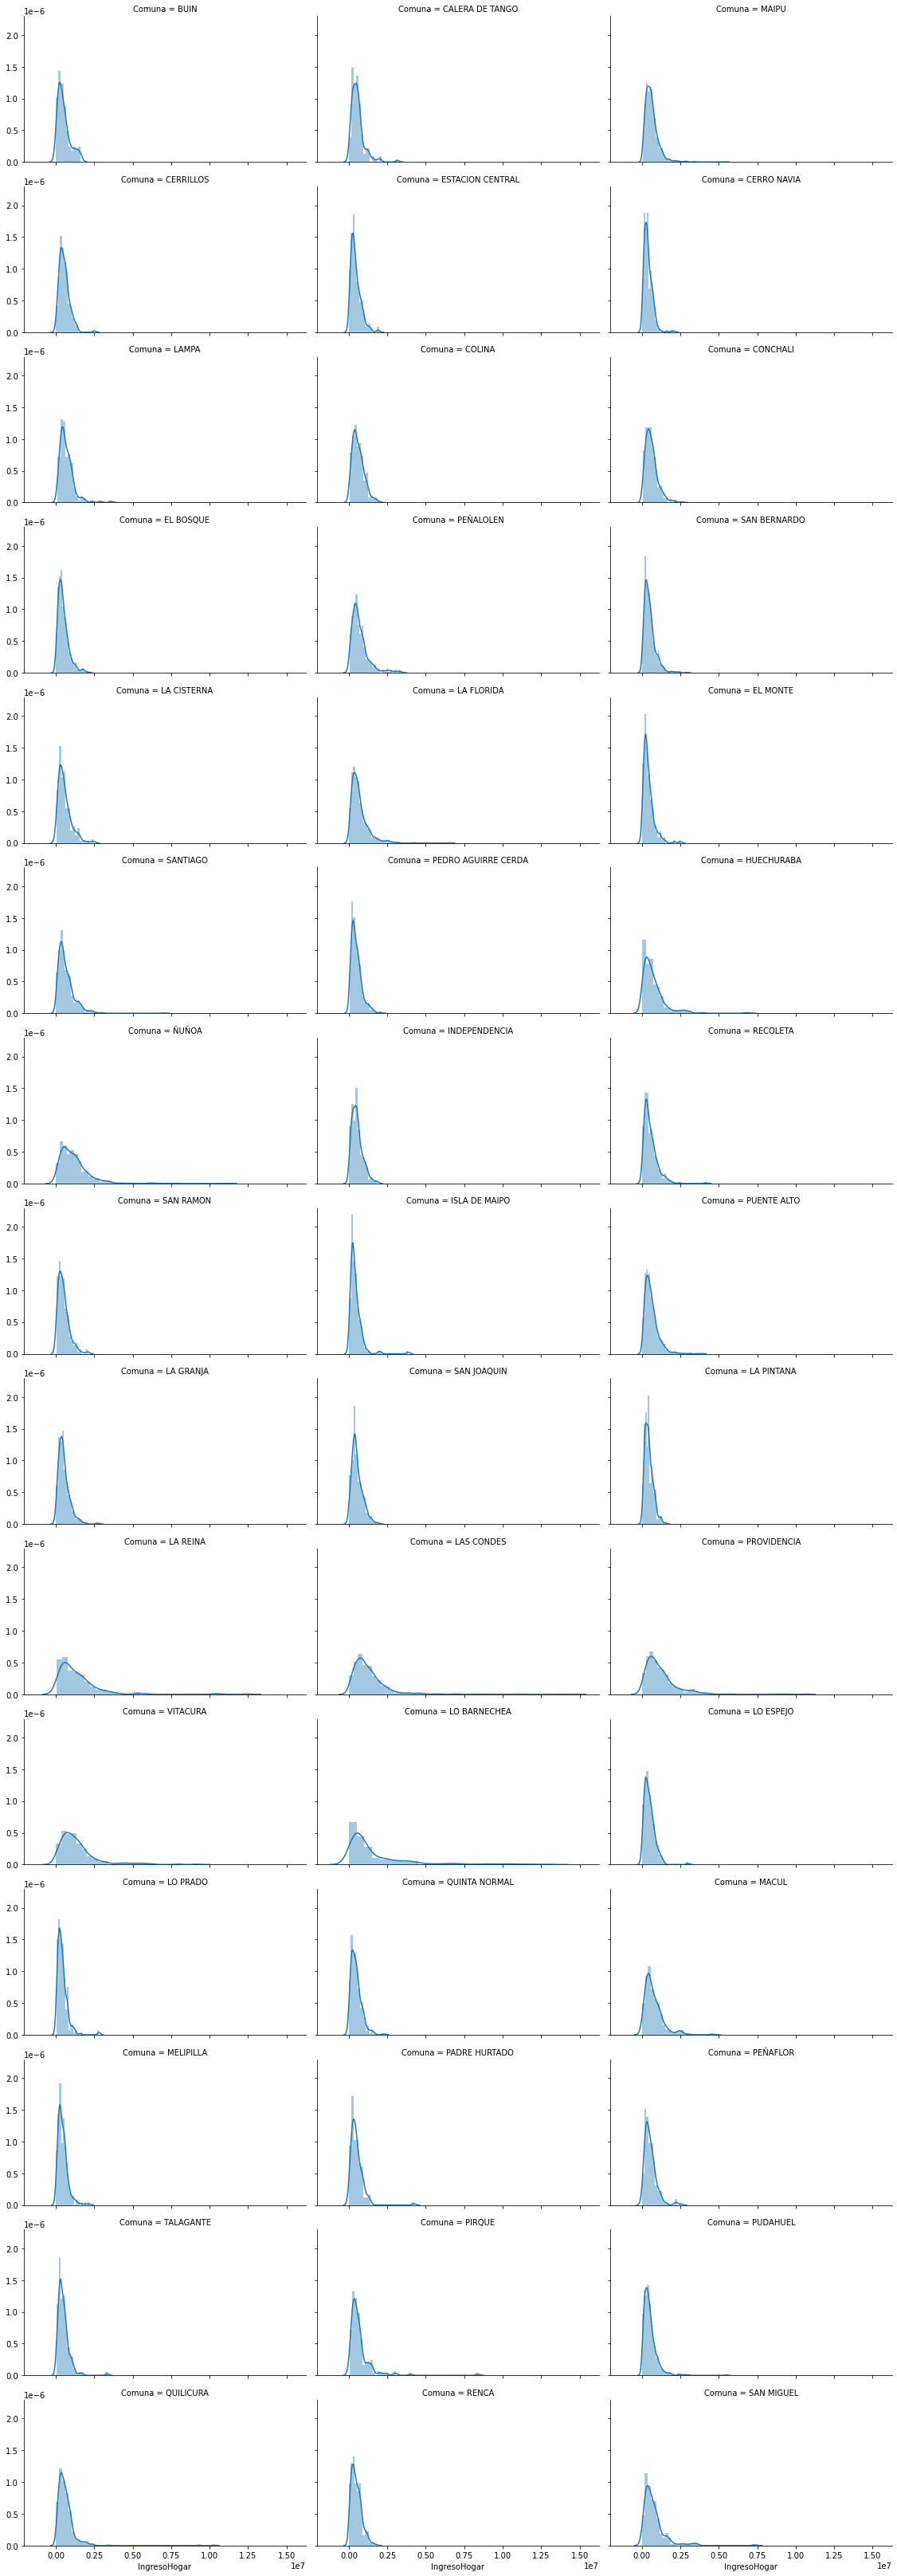

In [8]:
# Nuevamente nos deshacemos de los NaN
hogares = hogares.dropna(subset = ['IngresoHogar'])
graf = sns.FacetGrid(data= hogares, col='Comuna', col_wrap=3, aspect=1.75, height=3, sharey=True)
graf.map(sns.distplot, 'IngresoHogar')

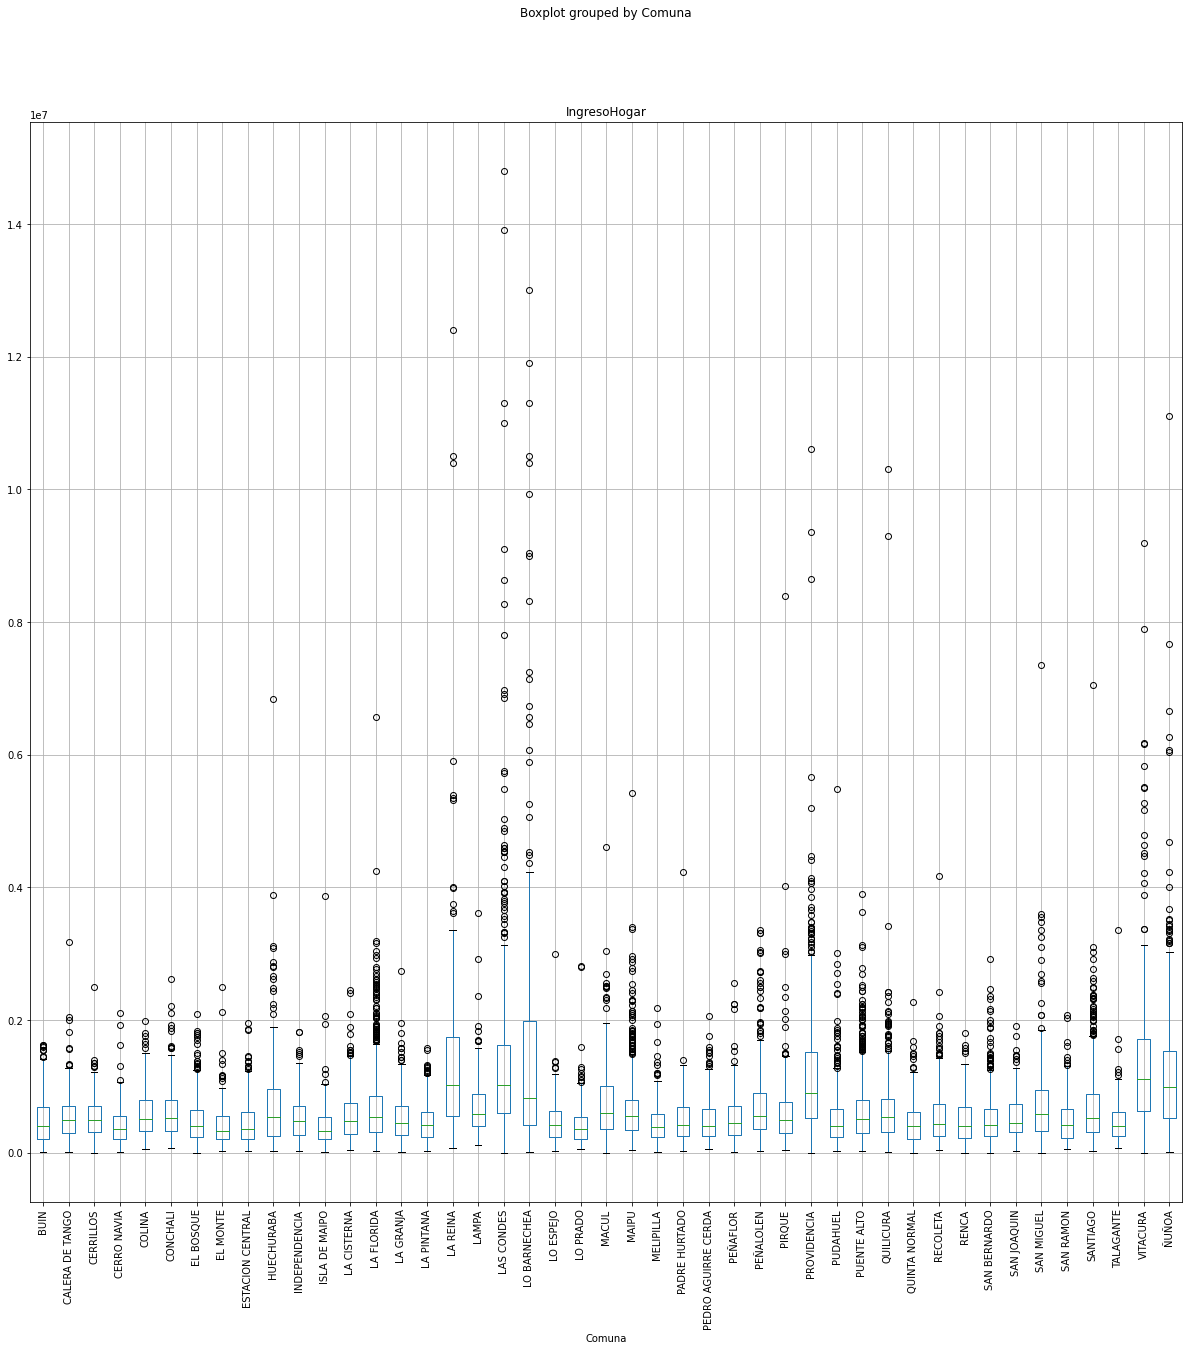

In [9]:
hogares.boxplot(column='IngresoHogar', by = 'Comuna', figsize = (20,20), rot=90)
plt.show()

# Mision 4

Construir un nuevo *Dataframe* a partir de la tabla viajes. 
Utilice la función `loc` para obtener solo los viajes que se originan en una comuna en especifico o llegan a una en especifico

Primero vamos a agregar los nombres de la comuna a la tabla viajes.

In [10]:
# Cargamos la tabla con información de propósito agregado
# La pasamos a un diccionario para ocuparla más facilmente
dict_comuna = pd.read_csv('Comuna.csv', sep=';', index_col='Id', encoding='latin-1')['Comuna'].to_dict()

# Quitamos las filas que tengan NaN en la columna deseada.
new_viajes = new_viajes.dropna(subset = ['ComunaOrigen', 'ComunaDestino'])

# La funcion lambda que se define a continuacion es muy similar a la siguiente funcion:
def corregir_ids(x):
    if int(x) in dict_comuna.keys():
        return x
    else:
        return 998

new_viajes['ComunaOrigen'] = new_viajes['ComunaOrigen'].map(lambda x: x if int(x) in dict_comuna.keys() else 998)
new_viajes['ComunaDestino'] = new_viajes['ComunaDestino'].map(lambda x: x if int(x) in dict_comuna.keys() else 998)

# Tambien podriamos haber ocupado la funcion corregir_ids
#new_viajes['ComunaOrigen'] = new_viajes['ComunaOrigen'].map(corregir_ids)

# Cambiamos los ID's por lo especificado en el diccionario
new_viajes['ComunaOrigen'] = new_viajes['ComunaOrigen'].map(lambda x: dict_comuna[x])
new_viajes['ComunaDestino'] = new_viajes['ComunaDestino'].map(lambda x: dict_comuna[x])

display(new_viajes.head(10))

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,OrigenCoordY,DestinoCoordX,DestinoCoordY,Proposito,PropositoAgregado,ActividadDestino,MediosUsados,ModoAgregado,ModoPriPub,ModoMotor,HoraIni,HoraFin,HoraMedia,TiempoViaje,TiempoMedio,Periodo,MinutosDespues,CuadrasDespues,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CódigoTiempo
0,173431,17343102,1734310202,1,MAIPU,MAIPU,2.0,2.0,400,407,335208.7188,6288387.0,338812.3125,6292391.0,7.0,Otro,NaN,2,2,2,1,22:30,23:40,23:05,70.0,3.0,6.0,6.0,1.0,1.000000,NaN,NaN,NaN,NaN,0.0
1,173441,17344101,1734410101,2,MAIPU,LAS CONDES,2.0,3.0,407,307,338536.4375,6291928.0,354267.3438,6302297.0,1.0,Trabajo,5.0,2;4,9,2,1,13:00,14:45,13:53,105.0,4.0,5.0,5.0,1.0,1.127220,NaN,NaN,NaN,NaN,0.0
2,173441,17344101,1734410102,2,LAS CONDES,MAIPU,3.0,2.0,307,407,354267.3438,6302297.0,338536.4375,6291928.0,7.0,Trabajo,NaN,4;2,9,2,1,22:00,23:30,22:45,90.0,3.0,5.0,10.0,2.0,1.127220,NaN,NaN,NaN,NaN,0.0
3,173441,17344103,1734410301,2,MAIPU,ÑUÑOA,2.0,3.0,407,437,338536.4375,6291928.0,350841.6563,6297212.0,1.0,Trabajo,5.0,2;4,9,2,1,9:00,9:55,9:27,55.0,2.0,5.0,10.0,2.0,1.127220,NaN,NaN,NaN,NaN,0.0
4,173441,17344103,1734410302,2,ÑUÑOA,MAIPU,3.0,2.0,437,407,350841.6563,6297212.0,338536.4375,6291928.0,7.0,Trabajo,NaN,4;2,9,2,1,19:00,21:30,20:15,150.0,5.0,4.0,10.0,2.0,1.052764,NaN,NaN,NaN,NaN,0.0
5,173451,17345101,1734510101,1,MAIPU,SANTIAGO,2.0,4.0,418,18,334191.8438,6285552.0,346141.8125,6298700.0,6.0,Otro,NaN,1,1,1,1,10:00,11:00,10:30,60.0,2.0,3.0,0.0,0.0,NaN,NaN,1.482104,NaN,NaN,NaN
6,173451,17345101,1734510102,1,SANTIAGO,MAIPU,4.0,2.0,18,418,346141.8125,6298700.0,334191.8438,6285552.0,7.0,Otro,NaN,1,1,1,1,15:00,15:45,15:23,45.0,2.0,5.0,0.0,0.0,NaN,NaN,1.482104,NaN,NaN,NaN
7,173451,17345101,1734510103,1,MAIPU,MAIPU,2.0,2.0,418,418,NaN,NaN,NaN,NaN,7.0,Volver a casa,NaN,8,17,5,2,17:00,17:20,17:10,20.0,1.0,5.0,10.0,2.0,NaN,NaN,1.482104,NaN,NaN,NaN
8,173451,17345101,1734510104,1,MAIPU,MAIPU,2.0,2.0,418,418,NaN,NaN,NaN,NaN,7.0,Volver a casa,NaN,8,17,5,2,18:00,18:20,18:10,20.0,1.0,4.0,5.0,1.0,NaN,NaN,1.482104,NaN,NaN,NaN
9,173451,17345102,1734510201,1,MAIPU,MAIPU,2.0,2.0,418,418,NaN,NaN,NaN,NaN,11.0,Otro,NaN,8,17,5,2,13:00,13:20,13:10,20.0,1.0,5.0,5.0,1.0,NaN,NaN,1.482104,NaN,NaN,NaN


In [11]:
def con_origen(nombre_comuna):
    return new_viajes.loc[new_viajes['ComunaOrigen'] == nombre_comuna]

display(con_origen('MAIPU').head(5))

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,OrigenCoordY,DestinoCoordX,DestinoCoordY,Proposito,PropositoAgregado,ActividadDestino,MediosUsados,ModoAgregado,ModoPriPub,ModoMotor,HoraIni,HoraFin,HoraMedia,TiempoViaje,TiempoMedio,Periodo,MinutosDespues,CuadrasDespues,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CódigoTiempo
0,173431,17343102,1734310202,1,MAIPU,MAIPU,2.0,2.0,400,407,335208.7188,6288387.0,338812.3125,6292391.0,7.0,Otro,NaN,2,2,2,1,22:30,23:40,23:05,70.0,3.0,6.0,6.0,1.0,1.00000,NaN,NaN,NaN,NaN,0.0
1,173441,17344101,1734410101,2,MAIPU,LAS CONDES,2.0,3.0,407,307,338536.4375,6291928.0,354267.3438,6302297.0,1.0,Trabajo,5.0,2;4,9,2,1,13:00,14:45,13:53,105.0,4.0,5.0,5.0,1.0,1.12722,NaN,NaN,NaN,NaN,0.0
3,173441,17344103,1734410301,2,MAIPU,ÑUÑOA,2.0,3.0,407,437,338536.4375,6291928.0,350841.6563,6297212.0,1.0,Trabajo,5.0,2;4,9,2,1,9:00,9:55,9:27,55.0,2.0,5.0,10.0,2.0,1.12722,NaN,NaN,NaN,NaN,0.0
5,173451,17345101,1734510101,1,MAIPU,SANTIAGO,2.0,4.0,418,18,334191.8438,6285552.0,346141.8125,6298700.0,6.0,Otro,NaN,1,1,1,1,10:00,11:00,10:30,60.0,2.0,3.0,0.0,0.0,NaN,NaN,1.482104,NaN,NaN,NaN
7,173451,17345101,1734510103,1,MAIPU,MAIPU,2.0,2.0,418,418,NaN,NaN,NaN,NaN,7.0,Volver a casa,NaN,8,17,5,2,17:00,17:20,17:10,20.0,1.0,5.0,10.0,2.0,NaN,NaN,1.482104,NaN,NaN,NaN


In [12]:
def con_destino(nombre_comuna):
    return new_viajes.loc[new_viajes['ComunaDestino'] == nombre_comuna]

display(con_destino('MAIPU').head(5))

,Hogar,Persona,Viaje,Etapas,ComunaOrigen,ComunaDestino,SectorOrigen,SectorDestino,ZonaOrigen,ZonaDestino,OrigenCoordX,OrigenCoordY,DestinoCoordX,DestinoCoordY,Proposito,PropositoAgregado,ActividadDestino,MediosUsados,ModoAgregado,ModoPriPub,ModoMotor,HoraIni,HoraFin,HoraMedia,TiempoViaje,TiempoMedio,Periodo,MinutosDespues,CuadrasDespues,FactorLaboralNormal,FactorSabadoNormal,FactorDomingoNormal,FactorLaboralEstival,FactorFindesemanaEstival,CódigoTiempo
0,173431,17343102,1734310202,1,MAIPU,MAIPU,2.0,2.0,400,407,335208.7188,6288387.0,338812.3125,6292391.0,7.0,Otro,NaN,2,2,2,1,22:30,23:40,23:05,70.0,3.0,6.0,6.0,1.0,1.000000,NaN,NaN,NaN,NaN,0.0
2,173441,17344101,1734410102,2,LAS CONDES,MAIPU,3.0,2.0,307,407,354267.3438,6302297.0,338536.4375,6291928.0,7.0,Trabajo,NaN,4;2,9,2,1,22:00,23:30,22:45,90.0,3.0,5.0,10.0,2.0,1.127220,NaN,NaN,NaN,NaN,0.0
4,173441,17344103,1734410302,2,ÑUÑOA,MAIPU,3.0,2.0,437,407,350841.6563,6297212.0,338536.4375,6291928.0,7.0,Trabajo,NaN,4;2,9,2,1,19:00,21:30,20:15,150.0,5.0,4.0,10.0,2.0,1.052764,NaN,NaN,NaN,NaN,0.0
6,173451,17345101,1734510102,1,SANTIAGO,MAIPU,4.0,2.0,18,418,346141.8125,6298700.0,334191.8438,6285552.0,7.0,Otro,NaN,1,1,1,1,15:00,15:45,15:23,45.0,2.0,5.0,0.0,0.0,NaN,NaN,1.482104,NaN,NaN,NaN
7,173451,17345101,1734510103,1,MAIPU,MAIPU,2.0,2.0,418,418,NaN,NaN,NaN,NaN,7.0,Volver a casa,NaN,8,17,5,2,17:00,17:20,17:10,20.0,1.0,5.0,10.0,2.0,NaN,NaN,1.482104,NaN,NaN,NaN


# Mision 5

Usando la información presente, genere un modelo de predicción del largo del viaje. Es libre de definir su modelo y variables a considerar, crear nuevas columnas, qué variables son independientes y cuáles son dependientes.


In [13]:
# Creamos otro DataFrame solo con columnas que nos interesan
df_M5 = pd.read_csv('viajes.csv', sep =";", decimal = ",", 
                    encoding='latin-1', usecols = ('Hogar', 'Viaje', 
                    'TiempoViaje', 'PropositoAgregado', 'ModoAgregado', 'ComunaOrigen'))

# Filtramos para tener coordenadas coherentes
viajes_filter = viajes.loc[(viajes['DestinoCoordX'] >= 0) & (viajes['OrigenCoordX'] >= 0) &
                   (viajes['DestinoCoordY'] >= 0) & (viajes['OrigenCoordY'] >= 0)]

distancia = lambda x: math.sqrt((x['DestinoCoordX'] - x['OrigenCoordX'])**2 + 
                                      (x['DestinoCoordY'] - x['OrigenCoordY'])**2)
# Calculamos la distancia
viajes_filter['Distancia'] = viajes_filter.apply(distancia, axis = 1)

#Agregamos la columna al Dataframe original
df_dist = viajes_filter[['Viaje','Distancia']].copy()
df_M5 = pd.merge(df_M5, df_dist, on = 'Viaje')

#Ahora se agregan algunas variables de otras tablas que son de interes
#Agregamos el ingreso de cada hogar
hogares = pd.read_csv('Hogares.csv', sep =";", decimal = ",", usecols = ('Hogar','IngresoHogar'))
df_M5 = pd.merge(df_M5, hogares, on = 'Hogar')

#se imprime el df para ver que este bien
df_M5.describe()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


,Hogar,Viaje,ComunaOrigen,PropositoAgregado,ModoAgregado,TiempoViaje,Distancia,IngresoHogar
count,93849.000000,9.384900e+04,93849.00000,93844.000000,93849.000000,93573.000000,9.384900e+04,9.384900e+04
mean,190760.987650,1.907610e+09,147.46545,2.109853,6.703257,42.255373,2.691452e+05,8.580118e+05
std,53595.967215,5.359597e+08,116.83734,0.965439,6.475243,37.125031,1.257156e+06,9.092392e+05
min,100020.000000,1.000200e+09,0.00000,1.000000,1.000000,0.000000,0.000000e+00,0.000000e+00
25%,146670.000000,1.466700e+09,75.00000,1.000000,1.000000,20.000000,1.502645e+03,3.821850e+05
50%,189161.000000,1.891610e+09,93.00000,2.000000,3.000000,30.000000,4.381978e+03,6.300000e+05
75%,234421.000000,2.344210e+09,322.00000,3.000000,15.000000,60.000000,1.076057e+04,1.029255e+06
max,743813.000000,7.438130e+09,999.00000,7.000000,18.000000,1335.000000,6.336663e+06,1.480000e+07


In [14]:
# Vemos como estan los datos
df_M5.apply(lambda x: sum(x.isnull()),axis=0)

Hogar                  0
Viaje                  0
ComunaOrigen           0
PropositoAgregado      5
ModoAgregado           0
TiempoViaje          276
Distancia              0
IngresoHogar           0
dtype: int64

### Veamos como se comportan los valores de Proposito Agregado


Text(0.5, 1.0, 'Viajes por PropositoAgregado')

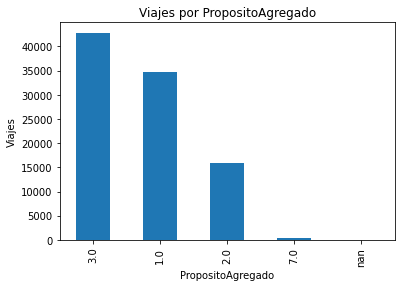

In [15]:
cuenta = df_M5['PropositoAgregado'].value_counts(dropna=False)
ax1 = cuenta.plot(kind='bar')
ax1.set_xlabel('PropositoAgregado')
ax1.set_ylabel('Viajes')
ax1.set_title("Viajes por PropositoAgregado")

### Como nos faltan solo 5 datos, rellenaremos estos datos con la categoria con mayor ocurrencia.

In [16]:
df_M5['PropositoAgregado'].fillna(3,inplace=True)

In [17]:
# Vemos como estan los datos despues del procesamiento
df_M5.apply(lambda x: sum(x.isnull()),axis=0)

Hogar                  0
Viaje                  0
ComunaOrigen           0
PropositoAgregado      0
ModoAgregado           0
TiempoViaje          276
Distancia              0
IngresoHogar           0
dtype: int64

Faltan hartos datos en TiempoViaje, asi que vamos a ver que pasa. Con el siguiente boxplot, podemos ver que hay muchos datos atipicos.

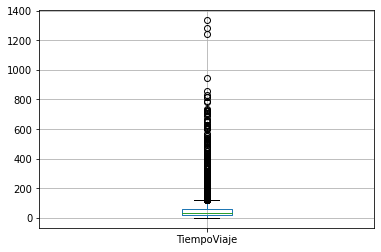

In [18]:
df_M5.boxplot(column='TiempoViaje')
plt.show()

Rellenamos los tiempos de viaje faltantes con la media

In [19]:
df_M5['TiempoViaje'].fillna(df_M5['TiempoViaje'].mean(), inplace=True)
# Pasamos TiempoViaje a int
df_M5['TiempoViaje'] = df_M5['TiempoViaje'].astype(np.int64)

Ahora veremos que pasa en la Distancia.


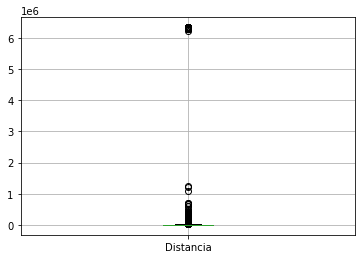

In [20]:
df_M5.boxplot(column='Distancia')
plt.show()

Podemos notar que la variable distancia no distribuye de buena manera, además, posee muchos valores extremos. Por eso vamos a aplicar una transformacion logaritmica

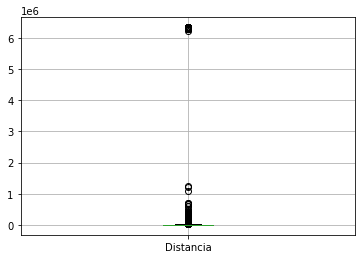

In [21]:
# Pasamos distancia a int
df_M5['Distancia'] = df_M5['Distancia'].astype(np.int64)
# Filtramos aquellos valores negativos
df_M5 = df_M5.loc[df_M5['Distancia'] >= 0]
# Para que veamos como quedo
df_M5.boxplot(column='Distancia')
plt.show()

Ahora vamos a analizar la variable IngresoHogar. La variable no posee valores faltantes, por lo tanto procederemos a ver como distribuye

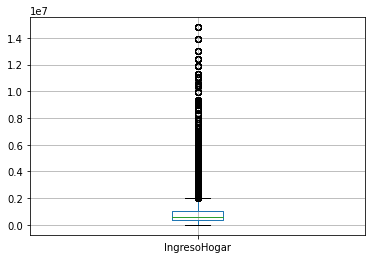

In [22]:
df_M5.boxplot(column='IngresoHogar')
plt.show()

Vamos a eliminar los valores atipicos utilizando como criterio los percentiles


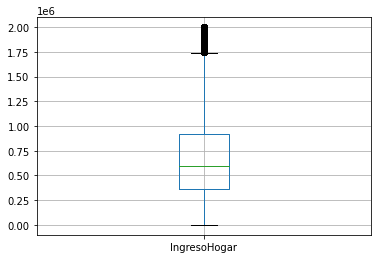

In [23]:
q = df_M5["IngresoHogar"].quantile(0.75)
rango = df_M5["IngresoHogar"].quantile(0.75) - df_M5["IngresoHogar"].quantile(0.25)
df_M5 = df_M5.loc[df_M5['IngresoHogar'] <= q + 1.5 * rango]
df_M5.boxplot(column='IngresoHogar')
plt.show()

### Terminado el preprocesamiento, pasamos las variables categoricas a variables numericas:

In [24]:
var_mod = ['PropositoAgregado', 'ModoAgregado', 'ComunaOrigen']
le = LabelEncoder()
for i in var_mod:
    df_M5[i] = le.fit_transform(df_M5[i])


display(df_M5.dtypes)

Hogar                int64
Viaje                int64
ComunaOrigen         int64
PropositoAgregado    int64
ModoAgregado         int64
TiempoViaje          int64
Distancia            int64
IngresoHogar         int64
dtype: object

### Aplicamos un modelo de Regresion Logistica en base a nuestros datos procesados

In [26]:
def classification_model(model, data, predictors, outcome):
    model.fit(data[predictors],data[outcome])
    predictions = model.predict(data[predictors])
    accuracy = metrics.accuracy_score(predictions,data[outcome])
    print("Rendimiento : %s" % "{0:.3%}".format(accuracy))

outcome_var = 'TiempoViaje'
model = LogisticRegression()
predictor_var = ['Distancia','IngresoHogar','PropositoAgregado', 'ModoAgregado', 'ComunaOrigen']
classification_model(model,df_M5.sample(2000),predictor_var,outcome_var)

Rendimiento : 17.200%


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
